In [4]:
import pandas as pd

df = pd.read_csv("data/counts_google_commoncrawl.csv")
df = df[filter(lambda x:x[0:7] != "Unnamed", df.columns)].sort_values(by="language")
df

,domain,language,count_commoncrawl,count_google
14,jagonews24.com,Bengali,21514,484000
23,dainikdristipat.com,Bengali,561,3780
22,magurarkotha.com,Bengali,562,2450
21,dailydeshbangla24.com,Bengali,564,591
20,nurulislambulbul.com,Bengali,565,595
19,nilkontho.net,Bengali,565,1450
18,newspostbd.com,Bengali,565,2450
17,protisomoy.com,Bengali,566,1060
16,brta.gov.bd,Bengali,8760,7310
12,banglanews24.com,Bengali,22635,957000


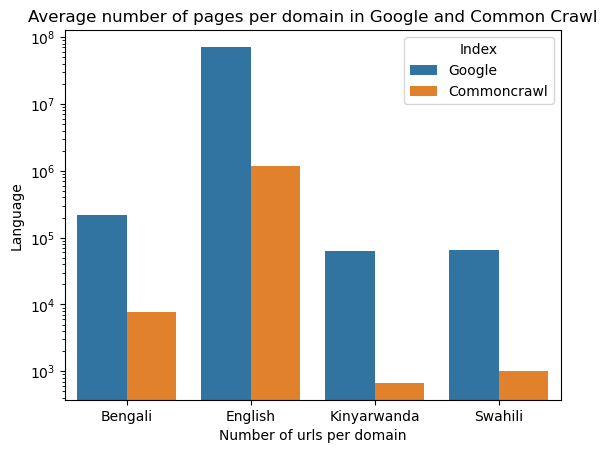

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

df2 = df[["domain", "language"]].copy()
df2["crawl"] = "Google"
df2["n"] = df["count_google"]

df3 = df[["domain", "language"]].copy()
df3["crawl"] = "Commoncrawl"
df3["n"] = df["count_commoncrawl"]

df4 = pd.concat((df2, df3))
ax = sns.barplot(df4, x="language", y="n", hue="crawl", errorbar=None)

plt.title("Average number of pages per domain in Google and Common Crawl")
plt.xlabel("Number of urls per domain")
plt.legend(title="Index")
plt.ylabel("Language")
plt.yscale("log")

import numpy as np

def format_val(val):
    i=0
    labels = ["", "K", "M"]
    while val >= 1000:
        val = val/1000
        i+=1
    return f"{round(val)}{labels[i]}"


Text(0, 0.5, 'Average number of pages')

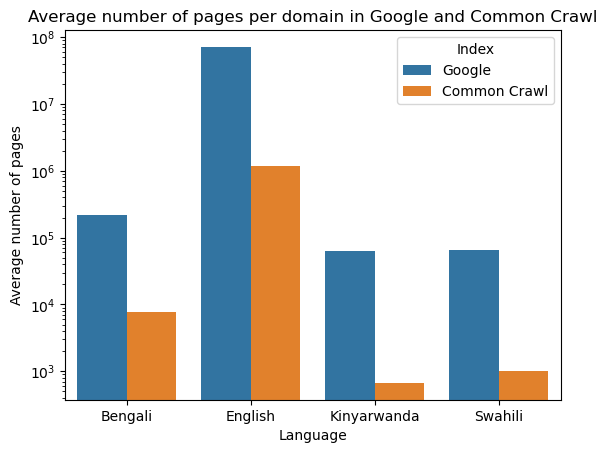

In [6]:
counts = []
for lang in df.language.unique():
    mean_google = df.query("language==@lang").count_google.mean()
    mean_cc = df.query("language==@lang").count_commoncrawl.mean()
    counts.append([lang, mean_google, mean_cc])

counts = pd.DataFrame(counts, columns=("language", "google", "cc"))
counts3 = counts.copy()
counts["Difference"] = 100*counts.google / counts.cc

counts2 = []
indexnames = {
    "cc": "Common Crawl",
    "google": "Google"
}
for c in ['google', 'cc']:
    x = counts[["language"]].copy()
    x["Index"] = indexnames[c]
    x["Count"] = counts[c]
    counts2.append(x)

counts2 = pd.concat(counts2)

sns.barplot(counts2, x="language", y="Count", hue="Index")
plt.yscale("log")
plt.title("Average number of pages per domain in Google and Common Crawl")
plt.xlabel("Language")
plt.ylabel("Average number of pages")

Text(0.5, 1.0, 'How much more data is in Google, compared to in Common Crawl?')

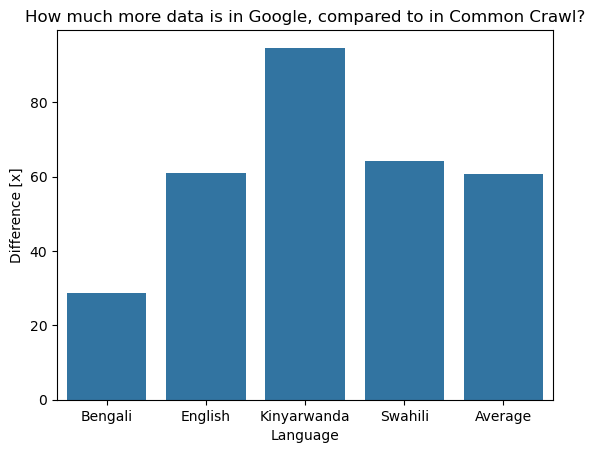

In [11]:
row = pd.DataFrame({
    "language": ["Average"],
    "google": [counts3.google.sum()],
    "cc": [counts3.cc.sum()]
})
counts4 = pd.concat((counts3, row))
counts4["Difference"] = counts4.google / counts4.cc

sns.barplot(counts4, x="language", y="Difference")
plt.xlabel("Language")
plt.ylabel("Difference [x]")
plt.title("How much more data is in Google, compared to in Common Crawl?")

In [8]:
counts4

,language,google,cc,Difference
0,Bengali,2.197822e+05,7.625833e+03,28.820741
1,English,7.118665e+07,1.167227e+06,60.987841
2,Kinyarwanda,6.356175e+04,6.715000e+02,94.656366
3,Swahili,6.438600e+04,1.001733e+03,64.274591
0,Average,7.153438e+07,1.176526e+06,60.801359


In [9]:
counts

,language,google,cc,Difference
0,Bengali,2.197822e+05,7.625833e+03,2882.074090
1,English,7.118665e+07,1.167227e+06,6098.784061
2,Kinyarwanda,6.356175e+04,6.715000e+02,9465.636634
3,Swahili,6.438600e+04,1.001733e+03,6427.459071


<Axes: xlabel='language'>

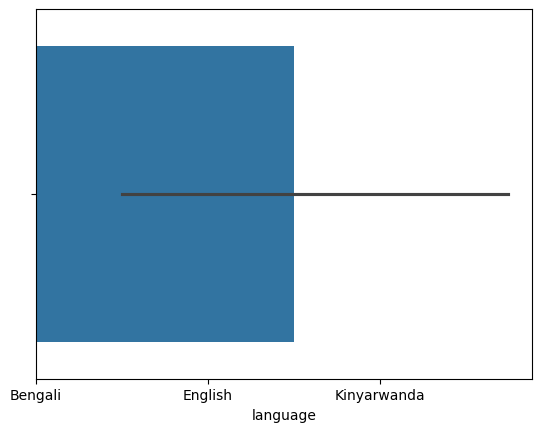

In [10]:
sns.barplot(counts, x="language")